## Handwritten digits dataset

* -> [dataset](https://medium.com/mlearning-ai/mnist-dataset-of-handwritten-digits-f8cf28edafe)

In [59]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [60]:
# Downloading data and transforming it to tensors
train_data = datasets.MNIST(root = 'data', train = True, transform = ToTensor(), download = True)
# Test data simply as it is
test_data = datasets.MNIST(root = 'data', train = False, transform = ToTensor(), download = True)

In [61]:
# The data
train_data, train_data.data.shape, train_data.targets

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 torch.Size([60000, 28, 28]),
 tensor([5, 0, 4,  ..., 5, 6, 8]))

In [62]:
loader = {
    'train': DataLoader(train_data, batch_size=100, shuffle=True, num_workers=1),
    'test': DataLoader(test_data, batch_size=100, shuffle=True, num_workers=1)
}

In [63]:
# Defining the model architecture
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__() # calling itself as a super constructor
    self.conv1 = nn.Conv2d(1, 10, kernel_size=5) # conv layer1
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5) # conv layer2
    self.conv2_drop = nn.Dropout2d() # dropout layer
    self.fc1 = nn.Linear(320, 50) # fully connected layer
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2)) # The Rectified Linear Unit
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    # flattening the data
    x = x.view(-1, 320) # 20x4x4
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training=self.training)
    x = self.fc2(x)

    return F.softmax(x)

In [66]:
model = CNN().to(device) # working on GPU
optimizer = optim.Adam(model.parameters(), lr=0.01) # or SGD
loss_fn = nn.CrossEntropyLoss()

def train(epoch): # epoch for logging
  model.train()
  for batch_index, (data, target) in enumerate(loader['train']):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward() # backward it to backpropogate to store gradients in the tensors
    optimizer.step()
    if batch_index % 20 == 0:
      print(f'Train Epoch: {epoch} [{batch_index * len(data)}/{len(loader["train"].dataset)} ({100. * batch_index / len(loader["train"]):.0f}%)]\t{loss.item():.6f}')

def test():
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad(): # disable grad calc
    for data, target in loader['test']:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += loss_fn(output, target).item()
      pred = output.argmax(dim=1, keepdim=True)
      correct += pred.eq(target.view_as(pred)).sum().item()
  test_loss /= len(loader["train"].dataset)
  print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loader["train"].dataset)} ({100. * correct / len(loader["train"].dataset):.0f}%\n)')

In [67]:
for epoch in range(1, 11):
  train(epoch)
  test()

<ipython-input-63-be47790e5fd0>:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	2.302053
Train Epoch: 1 [2000/60000 (3%)]	2.115432
Train Epoch: 1 [4000/60000 (7%)]	1.835226
Train Epoch: 1 [6000/60000 (10%)]	1.754271
Train Epoch: 1 [8000/60000 (13%)]	1.787698
Train Epoch: 1 [10000/60000 (17%)]	1.727607
Train Epoch: 1 [12000/60000 (20%)]	1.770287
Train Epoch: 1 [14000/60000 (23%)]	1.645606
Train Epoch: 1 [16000/60000 (27%)]	1.709121
Train Epoch: 1 [18000/60000 (30%)]	1.620206
Train Epoch: 1 [20000/60000 (33%)]	1.678094
Train Epoch: 1 [22000/60000 (37%)]	1.734790
Train Epoch: 1 [24000/60000 (40%)]	1.682721
Train Epoch: 1 [26000/60000 (43%)]	1.682519
Train Epoch: 1 [28000/60000 (47%)]	1.637746
Train Epoch: 1 [30000/60000 (50%)]	1.645975
Train Epoch: 1 [32000/60000 (53%)]	1.656120
Train Epoch: 1 [34000/60000 (57%)]	1.704613
Train Epoch: 1 [36000/60000 (60%)]	1.661657
Train Epoch: 1 [38000/60000 (63%)]	1.647623
Train Epoch: 1 [40000/60000 (67%)]	1.634174
Train Epoch: 1 [42000/60000 (70%)]	1.708295
Train Epoch: 1 [44000/60000 (73%)]	1.614123

Prediction: 9


<ipython-input-63-be47790e5fd0>:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


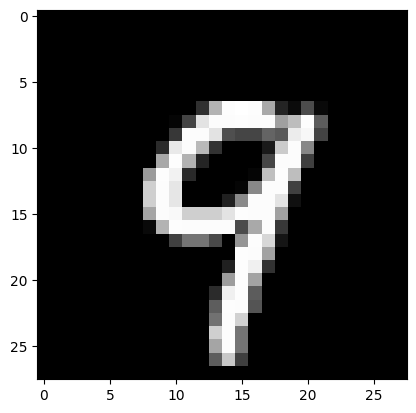

In [73]:
model.eval()

data, target = test_data[12]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()
print(f'Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()
